# Data Check & Merge

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가

font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

## 1. 데이터의 특징은 Train, Val이 같기 때문에 용량이 적은 Val을이용해서 확인하였음
* 그랬다면 하나씩만봐도 됐을텐데;
* 전부 4000 Fs를 가지고 있음
* Meta는 달라짐

### Dataset에 데이터를 모아두었음
* 데이터 0을 기준으로 나누어서 쓰는게 좋을듯
* 데이터 parquet형태임으로 load가 빠름

In [3]:
nor_path = "../2. Validation/"

In [275]:
# # 전체 데이터 Fs, Meta 확인하기
# df = pd.DataFrame()
# for kw in os.listdir(nor_path):
#     for motor_name in os.listdir( os.path.join(nor_path, kw) ):
#         print(kw, motor_name)
#         for check in os.listdir( os.path.join(nor_path, kw, motor_name) ):
#             now_path = os.path.join(nor_path, kw, motor_name, check)
#             file_list = os.listdir( now_path ) # 데이터 불러오기
#             files = [file for file in file_list if file.endswith('.csv')] #혹시 모를 불순물 거르기
#             # Meta, Fs summary
#             Meta = pd.concat([pd.read_csv(os.path.join(now_path, file), skiprows= 4, nrows=1, header= None, usecols=[2]) for file in files], ignore_index= True)
#             Fs = pd.concat([pd.read_csv(os.path.join(now_path, file), skiprows= 6, nrows=1, header= None, usecols=[1]) for file in files], ignore_index= True)
#             df = pd.concat([df, pd.DataFrame({"kw" : kw, "motor_name": motor_name, "check": check, "meta" : Meta.mean().values, "Frequence" : Fs.mean().values})])

#             # # data frame 합치기 
#             data = pd.concat([pd.read_csv(os.path.join(now_path, file), skiprows= 9, usecols=[0,1], names = ['time', 'acceleration']) for file in files], ignore_index= True)
#             data.to_parquet(f"{nor_path}/dataset/{kw}_{motor_name}_{check}.parquet", engine="pyarrow", index= False)
# df.to_csv("summary.csv", encoding= 'cp949', index = False) # summary

11kW L-CAHU-01R
11kW L-CAHU-03R
11kW R-CAHU-01R
11kW R-CAHU-02R
15kW L-CAHU-01S
15kW R-CAHU-01S
15kW R-CAHU-03S
18.5kW R-CAHU-01S
18.5kW R-CAHU-02S
2.2kW L-DEF-01
2.2kW L-DSF-01
2.2kW L-EF-04
2.2kW L-SF-04
2.2kW R-DEF-01
2.2kW R-EF-03
2.2kW R-EF-05
2.2kW R-SF-03
22kW L-CAHU-01S
22kW L-CAHU-02S
22kW R-CAHU-02S
3.75kW R-PAC-01R
3.7kW L-EF-01
3.7kW L-EF-02
3.7kW L-EF-04
3.7kW L-PAC-01
3.7kW R-EF-01
30kW R-PAHU-03S
37kW L-PAHU-02S
5.5kW L-SF-01
5.5kW L-SF-02
5.5kW R-CAHU-01R
5.5kW R-SF-01
55kW L-PAHU-03S
55kW R-PAHU-04S
7.5kW L-PAC-01
7.5kW L-SF-01
7.5kW R-CAHU-03R
7.5kW R-PAC-01S


NotADirectoryError: [WinError 267] 디렉터리 이름이 올바르지 않습니다: '../2. Validation/current.zip'

In [109]:
summary_df = pd.read_csv('summary.csv')
summary_df

,kw,motor_name,check,meta,Frequence,name1,name2,name3
0,11.0,L-CAHU-01R,정상,1765.0,4000.0,L,CAHU,01R
1,11.0,L-CAHU-01R,축정렬불량,1765.0,4000.0,L,CAHU,01R
2,11.0,L-CAHU-01R,회전체불평형,1750.0,4000.0,L,CAHU,01R
3,11.0,L-CAHU-03R,정상,1760.0,4000.0,L,CAHU,03R
4,11.0,R-CAHU-01R,벨트느슨함,1750.0,4000.0,R,CAHU,01R
...,...,...,...,...,...,...,...,...
64,7.5,L-SF-01,정상,1750.0,4000.0,L,SF,01
65,7.5,R-CAHU-03R,벨트느슨함,1760.0,4000.0,R,CAHU,03R
66,7.5,R-CAHU-03R,정상,1760.0,4000.0,R,CAHU,03R
67,7.5,R-PAC-01S,정상,1750.0,4000.0,R,PAC,01S


In [28]:
# df['motor_name'].apply(lambda x: x.split('-'))
df[['name1', 'name2', 'name3']] = df['motor_name'].str.split('-', expand= True)

<Axes: xlabel='name3', ylabel='meta'>

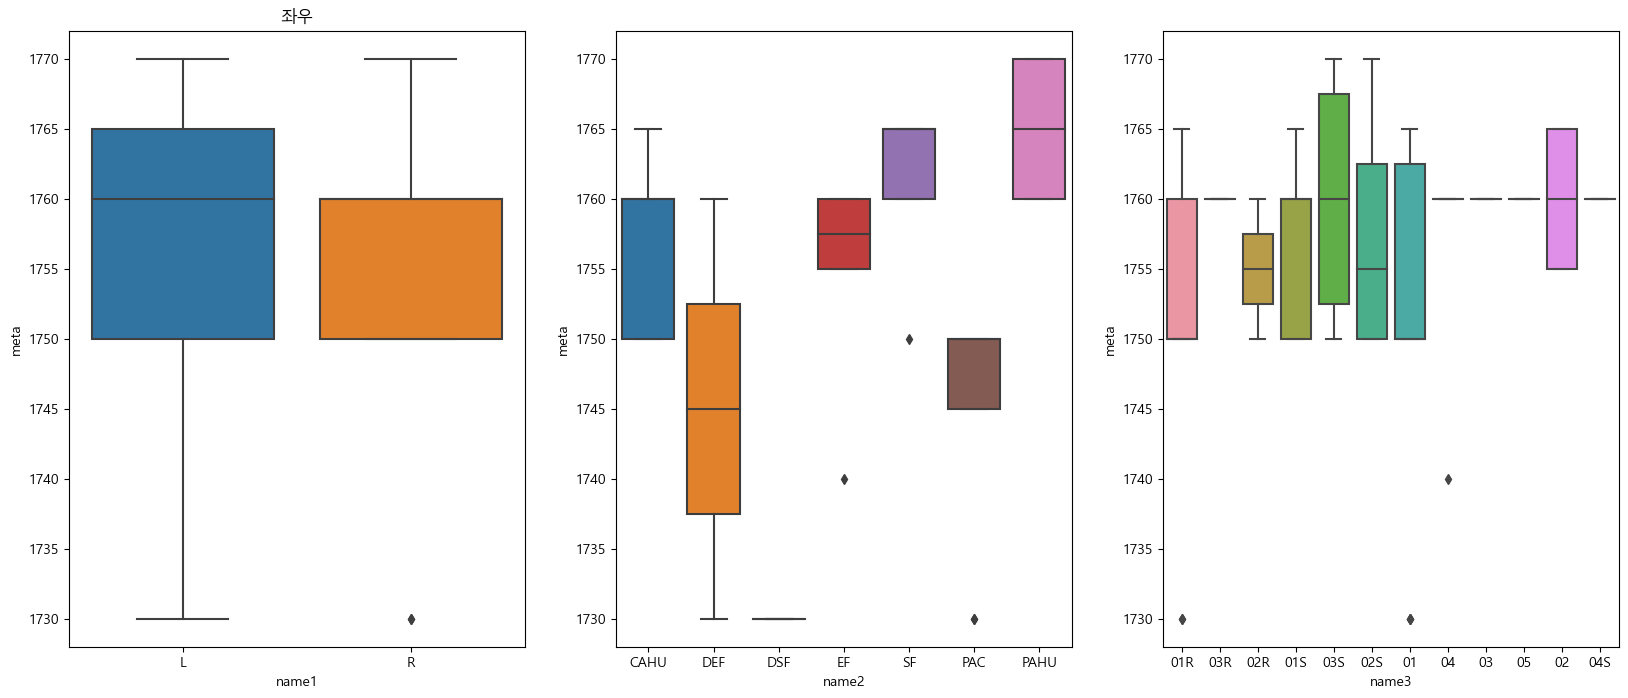

In [39]:
plt.figure(figsize= (20,8))
plt.subplot(1,3,1)
sns.boxplot(data = df, x = 'name1', y = 'meta')
plt.title('좌우')
plt.subplot(1,3,2)
sns.boxplot(data = df, x = 'name2', y = 'meta')
plt.subplot(1,3,3)
sns.boxplot(data = df, x = 'name3', y = 'meta')


## Data Check

In [3]:
Data = os.listdir(f'../5. Dataset_combine/2. Validation/')

# Sample = 11kW_L-CAHU-01R
kw_motor_name = '11kW_L-CAHU-01R'
Sample_name = [D for D in Data if kw_motor_name in D]
Sample_name

['11kW_L-CAHU-01R_정상.parquet',
 '11kW_L-CAHU-01R_축정렬불량.parquet',
 '11kW_L-CAHU-01R_회전체불평형.parquet']

In [5]:
import pyarrow.parquet as pq
Norm_df = pq.read_pandas(f'../5. Dataset_combine/2. Validation/{Sample_name[0]}').to_pandas() # 정상
Shaft_Err_df = pq.read_pandas(f'../5. Dataset_combine/2. Validation/{Sample_name[1]}').to_pandas() # 축정렬불량 Shaft Alignment Error
Sor_Err_df = pq.read_pandas(f'../5. Dataset_combine/2. Validation/{Sample_name[2]}').to_pandas() # 회전체불평형 solid of revolutio Error
motor_name = kw_motor_name.split('_')[1]
summary_df = pd.read_csv('summary.csv')
now_using_motor = summary_df[summary_df['motor_name'] == motor_name]
now_using_motor

,kw,motor_name,check,meta,Frequence
0,11.0,L-CAHU-01R,정상,1765.0,4000.0
1,11.0,L-CAHU-01R,축정렬불량,1765.0,4000.0
2,11.0,L-CAHU-01R,회전체불평형,1750.0,4000.0


In [17]:
Norm_df = Norm_df[0:Shaft_Err_df.shape[0]] #데이터 개수 맞춰주기

In [38]:
Smaplig_count = 4000 #Sample rate

In [39]:
# 100개를 기준으로 분산 구하기
def basic_stat(Data_frame, sample_count):
    grouped_df = Data_frame.groupby(Data_frame.index // sample_count)
    Var = grouped_df['acceleration'].var(ddof =0)
    Mean = grouped_df['acceleration'].mean()
    return (Var, Mean)



In [40]:
N_v, N_m = basic_stat(Norm_df, Smaplig_count)
SH_v, SH_m = basic_stat(Shaft_Err_df, Smaplig_count)
S_v, S_m = basic_stat(Sor_Err_df, Smaplig_count)

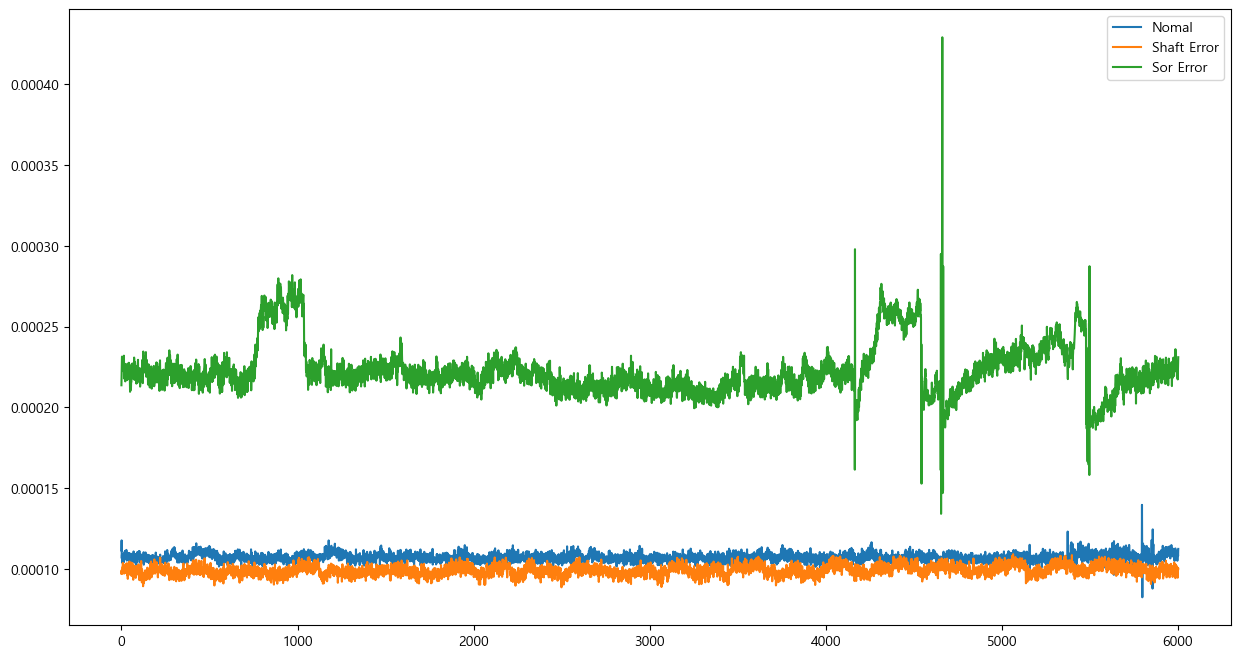

In [43]:
plt.figure(figsize= (15,8))
plt.plot(N_v, label = 'Nomal')
plt.plot(SH_v, label = 'Shaft Error')
plt.plot(S_v, label = 'Sor Error')
plt.legend()
plt.show()

c:\Users\chzhf\anaconda3\envs\aivle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


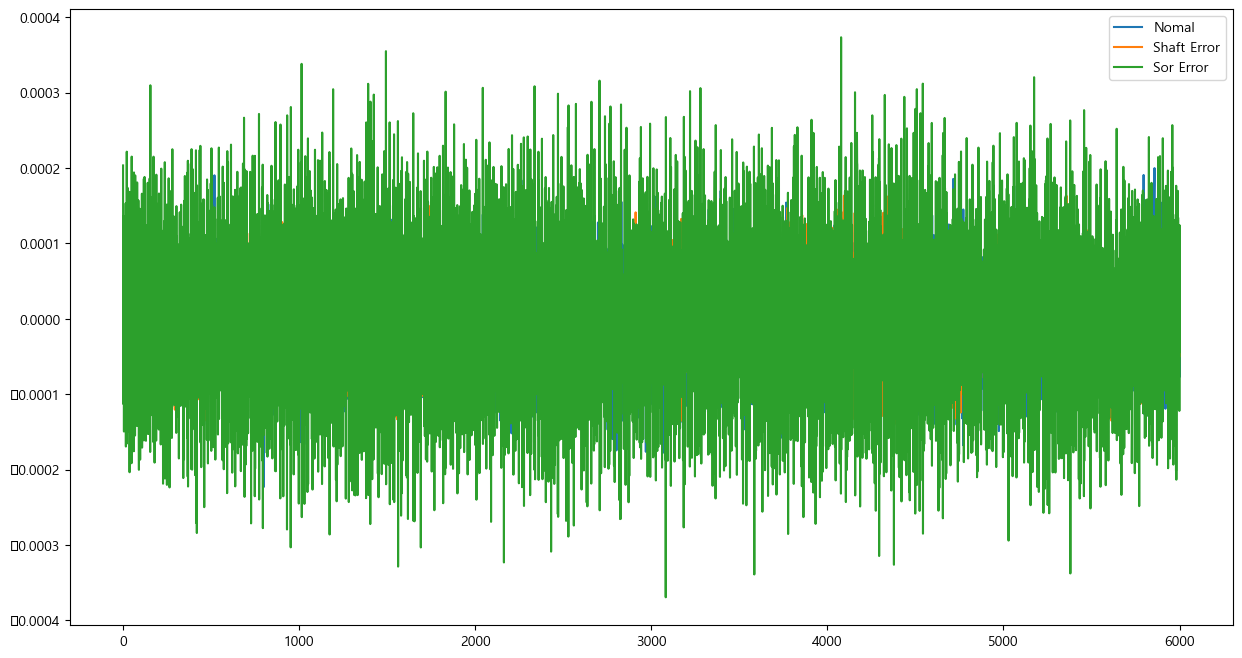

In [80]:
plt.figure(figsize= (15,8))
plt.plot(N_m, label = 'Nomal')
plt.plot(SH_m, label = 'Shaft Error')
plt.plot(S_m, label = 'Sor Error')
plt.legend()
plt.show()

# 확실히 고장 데이터가 진동 폭이 더 크다

### 데이터 로드

In [215]:
import sys
sys.path.append('D:/이근섭/88. 취미 및 다양한 활동/1. python 관련 연습/1. 기계시설물 고장 예지 센서/')
import Feature_extractor as fe

### FFT 계산
* FFT 결과는 대칭성을 가지고 있으므로 절반만 가져오는게 맞다

In [72]:
_N = Norm_df.shape[0]
Norn_Hz = 1765
SH_Hz = 1765
S_Fs_Hz = 1750
_dt = 1/4000

# def FFT(Norm_df, Hz, _dt):
Norm_yf_temp = np.fft.fft(Norm_df['acceleration'])
SH_yf_temp = np.fft.fft(Shaft_Err_df['acceleration'])
S_yf_temp = np.fft.fft(Sor_Err_df['acceleration'])

Norm_yf = np.abs(Norm_yf_temp[:_N // 2]) / (_N/2) # 길이 조정 
SH_yf = np.abs(SH_yf_temp[:_N // 2]) / (_N/2) # 길이 조정 
S_yf = np.abs(S_yf_temp[:_N // 2]) / (_N/2) # 길이 조정 

xf = np.fft.fftfreq(_N, d= _dt)[:_N // 2]

In [87]:
yf_df = pd.DataFrame({"Norm": Norm_yf, "SH":SH_yf, "Sor":S_yf})

In [79]:
grouped_df = yf_df.groupby(yf_df.index // Smaplig_count)

Var = grouped_df.var(ddof =0)
Mean = grouped_df.mean()

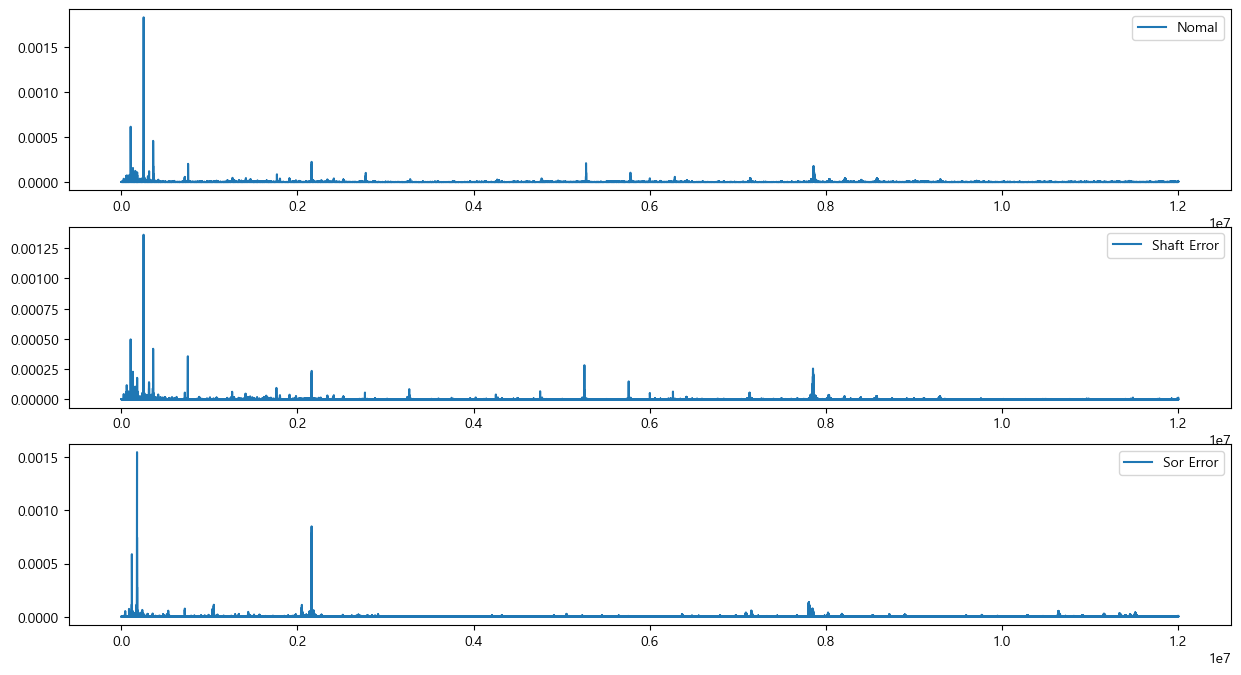

In [86]:
plt.figure(figsize= (15,8))
plt.subplot(3,1,1)
plt.plot(yf_df['Norm'], label = 'Nomal')
plt.legend()
plt.subplot(3,1,2)
plt.plot(yf_df['SH'], label = 'Shaft Error')
plt.legend()
plt.subplot(3,1,3)
plt.plot(yf_df['Sor'], label = 'Sor Error')
plt.legend()
plt.show()

# 정리

In [27]:
Names  = list(map(lambda x: x.split('.p')[0],Data))

Name = list(set(map(lambda x:x[:x.rfind('_')],Names)))
Name
Sample_name = [D for D in Data if Name in D]

state = list(map(lambda x: x.split('_')[2].split('.')[0],Sample_name))
state
print(Name,state)

['3.7kW_L-PAC-01',
 '11kW_R-CAHU-02R',
 '2.2kW_R-DEF-01',
 '7.5kW_R-PAC-01S',
 '2.2kW_L-DEF-01',
 '5.5kW_L-SF-02',
 '2.2kW_L-DSF-01',
 '30kW_R-PAHU-03S',
 '55kW_L-PAHU-03S',
 '2.2kW_L-SF-04',
 '3.75kW_R-PAC-01R',
 '7.5kW_L-SF-01',
 '3.7kW_L-EF-04',
 '5.5kW_R-CAHU-01R',
 '2.2kW_R-EF-03',
 '15kW_L-CAHU-01S',
 '2.2kW_R-SF-03',
 '2.2kW_R-EF-05',
 '22kW_L-CAHU-02S',
 '5.5kW_L-SF-01',
 '55kW_R-PAHU-04S',
 '11kW_R-CAHU-01R',
 '7.5kW_L-PAC-01',
 '2.2kW_L-EF-04',
 '18.5kW_R-CAHU-02S',
 '7.5kW_R-CAHU-03R',
 '22kW_R-CAHU-02S',
 '3.7kW_L-EF-02',
 '37kW_L-PAHU-02S',
 '5.5kW_R-SF-01',
 '11kW_L-CAHU-03R',
 '11kW_L-CAHU-01R',
 '18.5kW_R-CAHU-01S',
 '22kW_L-CAHU-01S',
 '3.7kW_R-EF-01',
 '15kW_R-CAHU-01S',
 '15kW_R-CAHU-03S',
 '3.7kW_L-EF-01']

# 시계열 데이터 확인


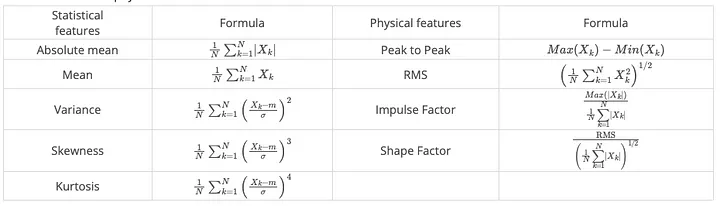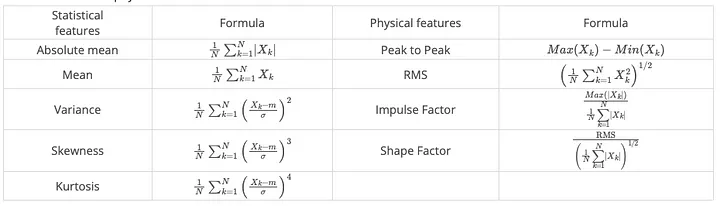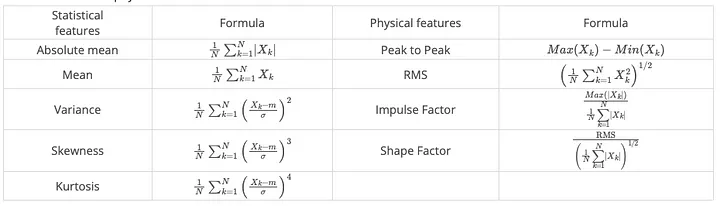

In [67]:
import pyarrow.parquet as pq
import sys
import os
import pandas as pd
import numpy as np
sys.path.append('D:/이근섭/88. 취미 및 다양한 활동/1. python 관련 연습/1. 기계시설물 고장 예지 센서/')
import Feature_extractor as fe
from matplotlib import pyplot as plt,font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

# 100개를 기준으로 분산 구하기
def basic_stat(Data_frame, sample_count):
    grouped_df = Data_frame.groupby(Data_frame.index // sample_count)
    use_data = grouped_df['acceleration']
    Var = use_data.var(ddof =0)
    Mean = use_data.mean()
    RMS = use_data.apply(lambda x: np.sqrt(np.sum(x**2)/len(x)))
    AbsMax = np.abs(use_data.max())
    AbsMean = np.abs(use_data.mean())
    P2P = use_data.max() - use_data.min()
    Skewness = use_data.skew()
    Kurtosis = use_data.apply(pd.DataFrame.kurt)
    CrestFactor = P2P/RMS
    ShapeFactor = RMS/AbsMean
    ImpulseFactor = AbsMax/AbsMean

    return (Var, Mean, AbsMax, AbsMean, P2P, RMS, Skewness, Kurtosis, CrestFactor, ShapeFactor, ImpulseFactor)


folder_path = '../5. Dataset_combine/1. Dataset/'
Data = os.listdir(f'{folder_path}')

Names  = list(map(lambda x: x.split('.p')[0],Data))

Names = list(set(map(lambda x:x[:x.rfind('_')],Names)))
only_Normal_data_list = []
data_list = []

for Name in Names:
    Sample_name = [D for D in Data if Name in D]



    df_list = []
    for i,name in enumerate(Sample_name):
        print(name)
        df_list.append(pq.read_pandas(f'{folder_path}{name}').to_pandas()) # 정상
    # 데이터 개수 맞추기
    Min_size = min(list(map(lambda x: x.shape[0],df_list))) 
    df_list1 = list(map(lambda x: x[0:Min_size],df_list))

    # Var, Mean 추출
    Smaplig_count = 4000
    Var_ = []
    Mean_ = []
    AbsMax_ = []
    AbsMean_ = []
    P2P_ = []
    RMS_ = []
    Skewness_ = []
    Kurtosis_ = []
    CrestFactor_ = []
    ShapeFactor_ = []
    ImpulseFactor_ = []

    for df in df_list1:
        vv, mm, AbsMax, AbsMean, P2P, RMS, Skewness, Kurtosis, CrestFactor, ShapeFactor, ImpulseFactor = basic_stat(df, Smaplig_count)
        Var_.append(vv)
        Mean_.append(mm)
        AbsMax_.append(AbsMax)
        P2P_.append(P2P)
        RMS_.append(RMS)
        Skewness_.append(Skewness)
        Kurtosis_.append(Kurtosis)
        CrestFactor_.append(CrestFactor)
        ShapeFactor_.append(ShapeFactor)
        ImpulseFactor_.append(ImpulseFactor)

    state = list(map(lambda x: x.split('_')[2].split('.')[0],Sample_name))

    if len(state) > 1 : 
        data_list.append(Name)
    else:
        only_Normal_data_list.append(Name)
    state_col = {'정상': 'blue', '베어링불량' : 'orange', "회전체불평형": "green", "축정렬불량": "brown", "벨트느슨함": "dimgrey"}

    statistics = [Mean_, Var_, AbsMax_, P2P_, RMS_, Skewness_, Kurtosis_, CrestFactor_, ShapeFactor_, ImpulseFactor_]
    statistics_names = ['Mean', 'Var', 'AbsMax', 'P2P', 'RMS', 'Skewness', 'Kurtosis', 'CrestFactor', 'ShapeFactor', 'ImpulseFactor']
    #csv
    for i, state_ in zip(range(len(df_list1)),state):
        Summary_df = pd.DataFrame(map(lambda x: x[i],statistics)).T
        Summary_df.columns = statistics_names
        csv_name = '_'.join(Sample_name[0].split('_')[:2])+ '_' + state_
        Summary_df.to_csv(f'../5. Dataset_combine/3. csv/{csv_name}.csv', index= False)

    # #plot
    # for i, stat in enumerate(statistics):
    #     plt.figure(figsize=(15, 8))
    #     for s, state_ in zip(stat, state):
    #         plt.plot(s, label=f'{state_}', color = state_col[state_])

    #         plt.legend()
    #     os.makedirs(f'../5. Dataset_combine/2. Plot/{statistics_names[i]}',exist_ok= True)
    #     plot_name = '_'.join(Sample_name[0].split('_')[:2])+ '_' + '_'.join(state)
    #     plt.savefig(f'../5. Dataset_combine/2. Plot/{statistics_names[i]}/{plot_name}.png')


7.5kW_L-PAC-01_베어링불량.parquet
7.5kW_L-PAC-01_정상.parquet
11kW_R-CAHU-02R_베어링불량.parquet
11kW_R-CAHU-02R_정상.parquet
30kW_R-PAHU-03S_정상.parquet
30kW_R-PAHU-03S_축정렬불량.parquet
55kW_L-PAHU-03S_정상.parquet
55kW_L-PAHU-03S_회전체불평형.parquet
15kW_R-CAHU-01S_베어링불량.parquet
15kW_R-CAHU-01S_정상.parquet
18.5kW_R-CAHU-01S_벨트느슨함.parquet
18.5kW_R-CAHU-01S_정상.parquet
55kW_R-PAHU-04S_벨트느슨함.parquet
55kW_R-PAHU-04S_정상.parquet
2.2kW_L-DSF-01_정상.parquet
2.2kW_L-DSF-01_축정렬불량.parquet
5.5kW_L-SF-01_벨트느슨함.parquet
5.5kW_L-SF-01_정상.parquet
2.2kW_R-EF-05_벨트느슨함.parquet
2.2kW_R-EF-05_정상.parquet
7.5kW_R-PAC-01S_정상.parquet
7.5kW_R-PAC-01S_축정렬불량.parquet
3.75kW_R-PAC-01R_정상.parquet
3.75kW_R-PAC-01R_축정렬불량.parquet
7.5kW_R-CAHU-03R_벨트느슨함.parquet
7.5kW_R-CAHU-03R_정상.parquet
2.2kW_L-EF-04_정상.parquet
2.2kW_L-EF-04_회전체불평형.parquet
22kW_R-CAHU-02S_벨트느슨함.parquet
22kW_R-CAHU-02S_정상.parquet
11kW_L-CAHU-01R_정상.parquet
11kW_L-CAHU-01R_축정렬불량.parquet
11kW_L-CAHU-01R_회전체불평형.parquet
3.7kW_R-EF-01_축정렬불량.parquet
7.5kW_L-SF-01_정상.parquet
2.2kW_L-DE

### 데이터 저장

In [155]:
data_list = []
d_state = []
d_count = []
only_Normal_data_list = []
ond_state = []
for Name in Names:
    Sample_name = [D for D in Data if Name in D]
    state = list(map(lambda x: x.split('_')[2].split('.')[0],Sample_name))
    print(len(state))

    if len(state) > 1 : 
        data_list.append(Name)
        d_state.append(', '.join(state))
        d_count.append(len(state))
    else:
        only_Normal_data_list.append(Name)
        ond_state.append(state[0])


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
1
1
1
2
2
2
2
2
1
2
2
2
2
1
2
1
2
2
2
1
1
2


In [157]:
ond_sor = sorted(zip(only_Normal_data_list , ond_state))
ond = np.pad(list(map(lambda x:x[0],ond_sor)), (0,len(data_list) - len(only_Normal_data_list)))
ond_s = np.pad(list(map(lambda x:x[1],ond_sor)), (0,len(data_list) - len(only_Normal_data_list)))

data_sor = sorted(zip(data_list , d_state, d_count))
data_list = list(map(lambda x:x[0],data_sor))
d_state = list(map(lambda x:x[1],data_sor))
d_count = list(map(lambda x:x[2],data_sor))

label_check = pd.DataFrame({'multi label' : data_list,
                            'label_name' : d_state,
                            'count' : d_count,
                             'one_label': ond,
                             'one_label_name' : ond_s})
label_check.to_csv('../5. Dataset_combine/label_check.csv', index = False,encoding='cp949')